### Emmition Classification using **`Electroencephalography(EEG)`**  Dataset:

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# For Displaying Maximum Columns:
pd.set_option('display.max_columns', None)

In [7]:
# Load the data from gdrive:
file_path = '/content/drive/MyDrive/emotions_data.csv'
data = pd.read_csv(file_path)

In [8]:
data.head()

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  \
0      -15.70        2.06        3.15         2.15         29.5       -353.0   
1        2.88        3.83       -4.82        25.60         32.8         29.6   
2       90.20       89.90        2.03         7.75         30.1       -441.0   
3        8.82        2.30       -1.97        17.30         32.0       -148.0   
4        3.06       41.40        5.52        26.10         34.3         43.7   

   mean_d_3_a2  mean_d_4_a2  mean_d_5_a  mean_d_6_a  mean_d_7_a  mean_d_8_a  \
0        14.40         21.5        5.98        30.7      -343.0        14.7   
1        21.50         17.4       25.50        31.7        31.5        26.2   
2         9.89         25.3      -68.90        25.3      -481.0       -65.4   
3        20.40         22.8       13.20        31.5      -147.0        16.9   
4        23.70         20.6       -3.87        34.1        43.7       -10.0   

   mean_d_9_a  mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  \
0        27.9         3.17         32.2       -368.0         15.9   
1        32.9        31.80         33.1         33.2         28.5   
2        20.0        79.80         31.0       -408.0         91.9   
3        27.7        15.70         30.7       -142.0         20.7   
4        22.9        59.40         26.7         60.3         64.7   

   mean_d_14_a  mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  \
0         36.4         7.08         28.8       -359.0         17.3   
1         26.8        32.40         34.7         33.8         27.0   
2         29.5        18.80         31.1       -335.0         32.2   
3         22.8        13.60         32.2       -135.0         21.2   
4         26.9        32.30         30.1         33.6         31.6   

   mean_d_19_a  mean_d_20_a  mean_d_21_a  mean_d_22_a  mean_d_23_a  \
0         19.6      -3.8300       -1.230    -10.80000       -0.363   
1         14.2       0.0342        1.100     -1.87000       -4.690   
2         19.9      76.6000        4.850     39.90000       75.300   
3         23.8       4.1500        0.556     -0.35400        3.460   
4         27.7      30.0000        0.276     -0.00677       33.700   

   mean_d_24_a  mean_d_25_a  mean_d_26_a  mean_d_27_a  mean_d_28_a  \
0        -6.41        -1.03       -2.780        14.60       -1.540   
1       -15.40        -6.22       -0.328        -3.53       -6.980   
2         5.27       -72.00       -0.843       -33.00      -82.000   
3        -4.96         1.63        1.330        -5.83       -0.298   
4        -2.36       -33.30        7.640       -16.60      -41.100   

   mean_d_29_a  mean_d_30_a  mean_d_31_a  mean_d_32_a  mean_d_33_a  \
0   -14.900000        -4.94        0.664         5.82       -2.920   
1    -9.370000        -6.85       -1.890        -4.13       -5.460   
2    -4.200000       -11.00       -0.972      -106.00      -22.300   
3     0.000777         3.71       -0.176       -12.10       -0.784   
4    -6.290000        -6.21        4.260        10.10       -7.930   

   mean_d_34_a  mean_d_35_a  mean_d_36_a  mean_d_37_a  mean_d_38_a  \
0         1.90         2.80       -1.550        25.50        -1.18   
1         3.20        -6.25       -1.430        -1.65        -2.28   
2         5.36      -149.00       -5.690       -72.90      -157.00   
3        -1.07        -2.52        0.771        -5.48        -3.75   
4        -7.14       -63.30        7.360       -16.60       -74.80   

   mean_d_39_a  mean_d_40_a  mean_d_41_a

In [9]:
data.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

In [10]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


# mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean      0.025378     0.052282     0.301655     0.036793     0.083567   
std      17.981796     8.509174    68.098894    17.010031    18.935378   
min    -218.000000  -255.000000 -1360.000000  -203.000000  -553.000000   
25%      -3.105000    -1.340000    -4.002500    -2.905000    -2.622500   
50%      -0.044600     0.132000     0.957500    -0.099750     0.146500   
75%       2.920000     1.540000     6.735000     2.535000     2.870000   
max     402.000000   257.000000  1150.000000   349.000000   444.000000   

       mean_d_0_a2  mean_d_1_a2  mean_d_2_a2  mean_d_3_a2  mean_d_4_a2  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     14.434887    26.908907  -105.588740    12.887584    23.926767   
std      19.515474    11.879437   211.103804    22.367222    22.135017   
min    -190.000000  -310.000000  -970.000000  -253.000000  -750.000000   
25%       5.590000    25.500000  -197.000000     3.947500    21.700000   
50%      14.100000    29.800000    12.950000    15.400000    25.200000   
75%      27.600000    31.700000    29.200000    26.200000    28.325000   
max     191.000000   116.000000   991.000000   245.000000   250.000000   

        mean_d_5_a   mean_d_6_a   mean_d_7_a   mean_d_8_a   mean_d_9_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     16.033058    27.060702  -104.679376    14.267053    24.283368   
std      24.429661    13.780414   211.082473    23.307269    16.597016   
min    -125.000000  -368.000000  -970.000000  -131.000000  -140.000000   
25%       6.490000    25.300000  -194.000000     4.300000    21.800000   
50%      14.400000    29.700000    13.300000    16.000000    25.200000   
75%      27.700000    31.600000    28.925000    26.400000    28.400000   
max     629.000000   335.000000   999.000000   444.000000   476.000000   

       mean_d_10_a  mean_d_11_a  mean_d_12_a  mean_d_13_a  mean_d_14_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     14.467447    26.959896  -105.381444    12.933635    24.003451   
std      19.511804    11.860676   211.000691    22.357290    21.953792   
min    -191.000000  -312.000000  -970.000000  -254.000000  -754.000000   
25%       5.630000    25.500000  -196.000000     3.970000    21.800000   
50%      14.100000    29.800000    12.900000    15.500000    25.100000   
75%      27.600000    31.700000    29.200000    26.200000    28.300000   
max     190.000000   118.000000  1000.000000   245.000000   251.000000   

       mean_d_15_a  mean_d_16_a  mean_d_17_a  mean_d_18_a  mean_d_19_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     16.049431    27.114985  -104.290668    14.294105    24.373668   
std      24.443949    13.737191   210.671349    23.324362    16.212550   
min    -125.000000  -368.000000  -973.000000  -131.000000  -137.000000   
25%       6.520000    25.300000  -193.250000     4.440000    21.800000   
50%      14.500000    29.700000    13.300000    16.100000    25.200000   
75%      27.700000    31.600000    29.000000    26.400000    28.400000   
max     629.000000   336.000000  1000.000000   444.000000   476.000000   

      

### Data Preprocessing:
**FFT (Fast Fourier Transform):**

- Utilizes mathematical tools for EEG data analysis.
- Computation of power spectral density (PSD) is employed to analyze characteristics of the acquired EEG signal.
- Selective representation of EEG samples is achieved through PSD estimation.
- Major characteristic waveforms within the EEG spectrum are identified across four frequency bands.
- Transforms raw EEG readings from time-dependent functions into frequency-dependent functions.
- Primarily employed for feature extraction from EEG signals.


In [11]:
# Extracting FFT data columns ('fft_0_a' to 'fft_749_a') from the 'data' DataFrame
fft_data = data.loc[:, 'fft_0_a':'fft_749_a']
# Displaying the first few rows of the extracted FFT data
fft_data.head()

fft_0_a  fft_1_a  fft_2_a  fft_3_a  fft_4_a  fft_5_a  fft_6_a  fft_7_a  \
0   -520.0   398.00   -201.0   -201.0   398.00    -52.2   121.00    -64.0   
1     66.2    -4.30     43.6     43.6    -4.30     66.0   -29.00     73.3   
2    -90.8   204.00    -77.1    -77.1   204.00   -488.0   415.00   -187.0   
3    119.0     6.25     10.9     10.9     6.25   -333.0   283.00   -144.0   
4     59.0    -2.37     10.8     10.8    -2.37    118.0    -1.81     26.7   

   fft_8_a  fft_9_a  fft_10_a  fft_11_a  fft_12_a  fft_13_a  fft_14_a  \
0    -64.0   121.00    -412.0    330.00   -229.00   -229.00    330.00   
1     73.3   -29.00     130.0      5.51     27.00     27.00      5.51   
2   -187.0   415.00    -420.0    375.00   -153.00   -153.00    375.00   
3   -144.0   283.00      85.8     39.70     -5.02     -5.02     39.70   
4     26.7    -1.81     149.0     -6.35      4.31      4.31     -6.35   

   fft_15_a  fft_16_a  fft_17_a  fft_18_a  fft_19_a  fft_20_a  fft_21_a  \
0    -508.0    331.00   -176.00   -176.00    331.00      86.8    -40.60   
1     181.0     -3.69     -5.00     -5.00     -3.69     170.0      7.46   
2    -332.0    360.00   -137.00   -137.00    360.00    -567.0    545.00   
3     209.0    -47.50     15.10     15.10    -47.50    -531.0    449.00   
4     166.0     -5.94     -1.01     -1.01     -5.94     166.0     16.10   

   fft_22_a  fft_23_a  fft_24_a  fft_25_a  fft_26_a  fft_27_a  fft_28_a  \
0      71.4      71.4    -40.60    -305.0    250.00    -125.0    -125.0   
1     -25.2     -25.2      7.46     193.0      8.37     -19.4     -19.4   
2    -281.0    -281.0    545.00    -433.0    458.00    -232.0    -232.0   
3    -209.0    -209.0    449.00     205.0     50.50     -31.9     -31.9   
4     -20.1     -20.1     16.10     172.0     -7.06      30.5      30.5   

   fft_29_a  fft_30_a  fft_31_a  fft_32_a  fft_33_a  fft_34_a  fft_35_a  \
0    250.00    -448.0    415.00   -249.00   -249.00    415.00     195.0   
1      8.37     189.0     18.80     -8.48     -8.48     18.80     175.0   
2    458.00    -377.0    459.00   -210.00   -210.00    459.00    -481.0   
3     50.50      57.6    116.00    -53.90    -53.90    116.00    -545.0   
4     -7.06      70.6     -9.26     77.20     77.20     -9.26     142.0   

   fft_36_a  fft_37_a  fft_38_a  fft_39_a  fft_40_a  fft_41_a  fft_42_a  \
0     -75.1     45.60     45.60     -75.1    -522.0    410.00   -184.00   
1      22.8    -36.60    -36.60      22.8     108.0    -19.60      1.63   
2     432.0   -211.00   -211.00     432.0    -296.0    332.00   -157.00   
3     508.0   -254.00   -254.00     508.0     239.0    -46.20     21.70   
4      21.2     -3.78     -3.78      21.2     221.0     -3.27    -31.10   

   fft_43_a  fft_44_a  fft_45_a  fft_46_a  fft_47_a  fft_48_a  fft_49_a  \
0   -184.00    410.00    -406.0    379.00  -153.000  -153.000    379.00   
1      1.63    -19.60     124.0     -3.32    -0.406    -0.406     -3.32   
2   -157.00    332.00     -87.1    175.00   -56.700   -56.700    175.00   
3     21.70    -46.20     210.0    -47.20    14.500    14.500    -47.20   
4    -31.10     -3.27     120.0     -9.86    28.600    28.600     -9.86   

   fft_50_a  fft_51_a  fft_52_a  fft_53_a  fft_54_a  fft_55_a  fft_56_a  \
0      29.8    126.00     -7.97     -7.97    126.00   -387.00     365.0   
1      87.4    -26.80     20.30     20.30    -26.80    148.00     -10.8   
2    -384.0    351.00   -175.00   -175.00    351.00   -431.00     369.0   
3    -364.0    278.00   -133.00   -133.00    278.00     -9.03      93.0   
4      98.7     -9.58      9.31      9.31     -9.58    192.00     -37.6   

   fft_57_a  fft_58_a  fft_59_a  fft_60_a  fft_61_a  fft_62_a  fft_63_a  \
0   -252.00   -252.00     365.0    -202.0     338.0    -212.0    -212.0   
1      1.51      1.51     -10.8      91.0     -10.1      31.6      31.6   
2   -144.00   -144.00     369.0    -409.0     434.0    -149.0    -149.0   
3      6.31      6.31      93.0    -118.0     202.0     -81.4     -81.4   
4    -14.90    -14.9

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


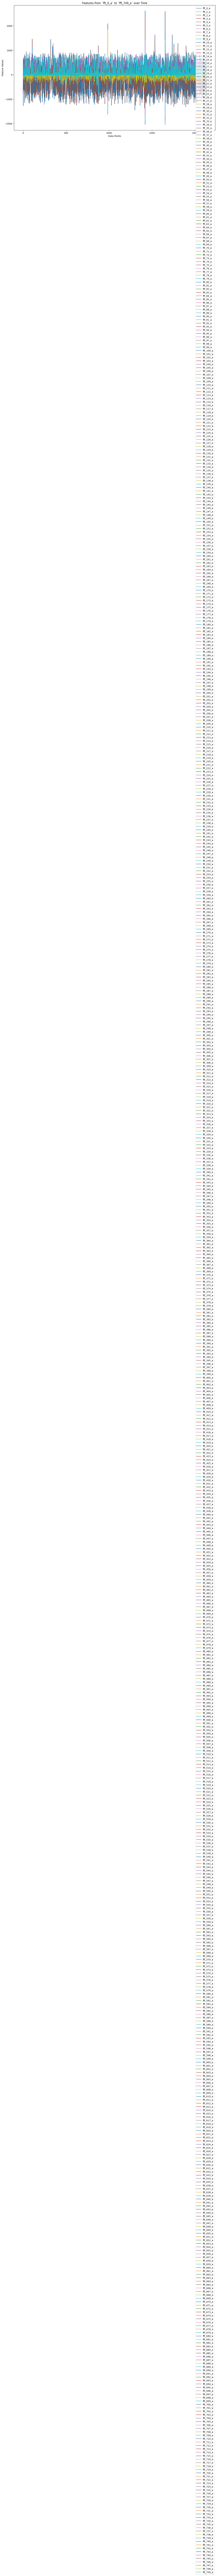

In [12]:
import matplotlib.pyplot as plt

# Set the figure size for better visualization
plt.figure(figsize=(16, 10))
# Plot each feature from `fft_0_a` to `fft_749_a`
for column in fft_data.columns:
    plt.plot(fft_data[column], label=column)
# Add labels and title
plt.xlabel("Data Points")
plt.ylabel("Feature Values")
plt.title("Features from `fft_0_a` to `fft_749_a` over Time")
# Add a legend for better interpretation
plt.legend()
# Show the plot
plt.show()

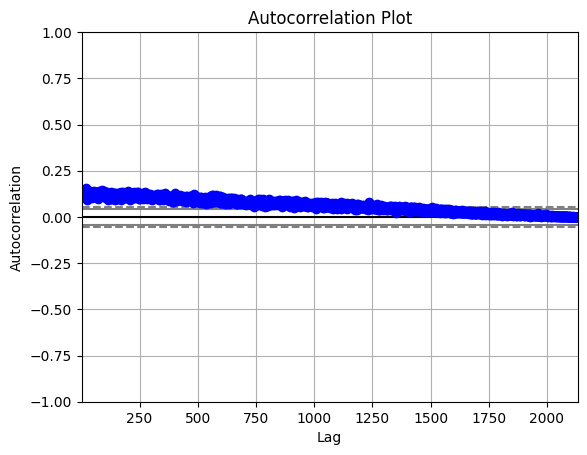

In [13]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(fft_data, marker='o', linestyle='-', color='b')
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [15]:
data_copy = data.copy(deep=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()  # Create a LabelEncoder instance
data_copy['label'] = label.fit_transform(data_copy['label'])

In [18]:
# Make a copy of data_copy
data_processed = data_copy.copy()

In [19]:
# Display unique values in the 'label' column
unique_labels = data_processed['label'].unique()

In [20]:
# Extract labels and drop the 'label' column from the DataFrame
labels = data_processed['label']
data_processed.drop(['label'], axis=1, inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
# Assuming you have defined data_processed and labels earlier
X_train, X_test, y_train, y_test = train_test_split(data_processed, labels, test_size=0.2, random_state=42)

In [23]:
import numpy as np
# Assuming X_train and X_test are pandas DataFrames
X_train = np.expand_dims(X_train.values, axis=1)
X_test = np.expand_dims(X_test.values, axis=1)

### **Using LSTM to train the Model:**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Create a Sequential model
model = Sequential()
# Add an LSTM layer with 256 units and input shape based on the training data
model.add(LSTM(units=256, input_shape=(X_train.shape[1], X_train.shape[2])))
# Add a Dense output layer with 3 units (assuming you have 3 classes) and softmax activation
model.add(Dense(units=3, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               2872320   
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2873091 (10.96 MB)
Trainable params: 2873091 (10.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Fit the model
history = model.fit(
    X_train,  # Training data
    y_train,  # Training labels
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),  # Validation data and labels
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
54/54 [==============================] - 2s 14ms/step - loss: 0.8192 - accuracy: 0.6023 - val_loss: 0.6773 - val_accuracy: 0.6932
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 0.6574 - accuracy: 0.7003 - val_loss: 0.6170 - val_accuracy: 0.7330
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 0.6234 - accuracy: 0.7114 - val_loss: 0.5916 - val_accuracy: 0.7424
Epoch 4/100
54/54 [==============================] - 0s 6ms/step - loss: 0.6019 - accuracy: 0.7202 - val_loss: 0.5716 - val_accuracy: 0.7494
Epoch 5/100
54/54 [==============================] - 0s 6ms/step - loss: 0.5893 - accuracy: 0.7290 - val_loss: 0.5602 - val_accuracy: 0.7471
Epoch 6/100
54/54 [==============================] - 0s 6ms/step - loss: 0.5802 - accuracy: 0.7308 - val_loss: 0.5504 - val_accuracy: 0.7564
Epoch 7/100
54/54 [==============================] - 0s 6ms/step - loss: 0.5729 - accuracy: 0.7372 - val_loss: 0.5447 - val_accuracy: 0.7564
Epoch 8/100


In [37]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
# Print the test loss and accuracy
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

14/14 [==============================] - 0s 3ms/step - loss: 0.5121 - accuracy: 0.7728
Test Loss: 0.5121444463729858, Test Accuracy: 0.7728337049484253


### **Using GRU to train the Model:**

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
# Create a Sequential model
gru_model = Sequential()
# Add a GRU layer with 256 units and input shape based on the training data
gru_model.add(GRU(units=256, input_shape=(X_train.shape[1], X_train.shape[2])))
# Add a Dense output layer with 3 units (assuming you have 3 classes) and softmax activation
gru_model.add(Dense(units=3, activation='softmax'))
# Compile the model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               2872320   
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2873091 (10.96 MB)
Trainable params: 2873091 (10.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Fit the model
history = model.fit(
    X_train,                   # Training data
    y_train,                   # Training labels
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),  # Validation data and labels
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
54/54 [==============================] - 1s 11ms/step - loss: 0.5113 - accuracy: 0.7724 - val_loss: 0.5116 - val_accuracy: 0.7752
Epoch 2/100
54/54 [==============================] - 1s 11ms/step - loss: 0.5115 - accuracy: 0.7701 - val_loss: 0.5148 - val_accuracy: 0.7728
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.5088 - accuracy: 0.7677 - val_loss: 0.5112 - val_accuracy: 0.7822
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 0.5082 - accuracy: 0.7730 - val_loss: 0.5111 - val_accuracy: 0.7775
Epoch 5/100
54/54 [==============================] - 0s 9ms/step - loss: 0.5062 - accuracy: 0.7683 - val_loss: 0.5115 - val_accuracy: 0.7775
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.5060 - accuracy: 0.7771 - val_loss: 0.5127 - val_accuracy: 0.7728
Epoch 7/100
54/54 [==============================] - 0s 9ms/step - loss: 0.5038 - accuracy: 0.7718 - val_loss: 0.5112 - val_accuracy: 0.7728
Epoch 8/10

In [41]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# Print the test loss and accuracy
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

14/14 [==============================] - 0s 4ms/step - loss: 0.5111 - accuracy: 0.7775
Test Loss: 0.5110800862312317, Test Accuracy: 0.777517557144165


14/14 [==============================] - 0s 3ms/step


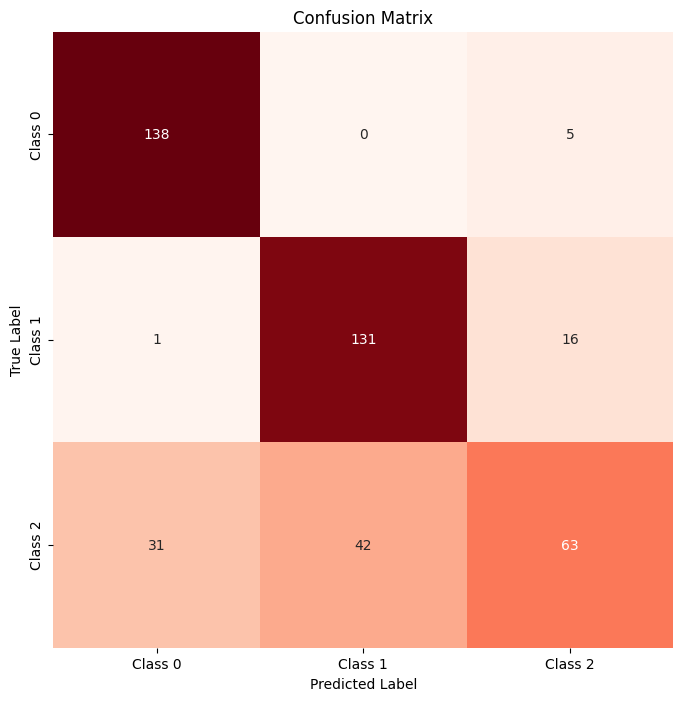

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Predict labels using the model
y_pred = np.argmax(model.predict(X_test), axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', cbar=False)
plt.xticks(np.arange(3) + 0.5, labels=["Class 0", "Class 1", "Class 2"])
plt.yticks(np.arange(3) + 0.5, labels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()